In [4]:
import geopandas as gpd
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

In [5]:
# Loading data
df_src = pd.read_csv('Building_Violations.csv')
df_com = pd.read_csv('Chicago_community.csv')
gdf = gpd.read_file("boundaries-zipcode.geojson")

In [6]:
df_src.head()

,ID,VIOLATION LAST MODIFIED DATE,VIOLATION DATE,VIOLATION CODE,VIOLATION STATUS,VIOLATION STATUS DATE,VIOLATION DESCRIPTION,VIOLATION LOCATION,VIOLATION INSPECTOR COMMENTS,VIOLATION ORDINANCE,...,ADDRESS,STREET NUMBER,STREET DIRECTION,STREET NAME,STREET TYPE,PROPERTY GROUP,SSA,LATITUDE,LONGITUDE,LOCATION
0,1218020,10/17/2006,04/26/2006,BR1001,OPEN,NaN,OWNER OR LICENSED CONTRACTOR,NaN,NaN,The code violations listed below must be corre...,...,3500 N HOYNE AVE,3500,N,HOYNE,AVE,131287,NaN,41.945098,-87.681079,"(41.945098077372535, -87.68107885384137)"
1,1587577,08/22/2006,01/20/2006,CN104015,OPEN,NaN,"REPLCE WINDOW PANES, PLEXGLAS",NaN,EAST WINDOW PANES BROKEN,"Replace broken, missing or defective window pa...",...,9129 S COMMERCIAL AVE,9129,S,COMMERCIAL,AVE,475460,5.0,41.729193,-87.551088,"(41.72919293390076, -87.5510883676378)"
2,1787465,01/23/2007,12/06/2006,CN132016,COMPLIED,01/11/2007,HEAT UNIT ADEQUATELY,NaN,INADEQUATE TEMPERATURE NO HEAT IN UNIT (3F) DU...,Heat dwelling unit adequately from September 1...,...,1131 S MOZART ST,1131,S,MOZART,ST,257101,NaN,41.867352,-87.696999,"(41.86735235712279, -87.69699881056887)"
3,1787466,12/13/2006,12/11/2006,CN104015,OPEN,NaN,"REPLCE WINDOW PANES, PLEXGLAS",NaN,BROKEN WINDOW PANES: EAST ELEVATION AND BASEMENT,"Replace broken, missing or defective window pa...",...,6729 S ADA ST,6729,S,ADA,ST,397358,NaN,41.771401,-87.657781,"(41.77140078127146, -87.65778095737407)"
4,1787467,12/31/2006,12/08/2006,CN107035,OPEN,NaN,MAINTAIN EXIT SIGN ILLUMINATED,NaN,2ND FLOOR EXIT SIGN NOT WORK,Failed to maintain all exit signs illuminated ...,...,9138 S COMMERCIAL AVE,9138,S,COMMERCIAL,AVE,21461,5.0,41.728905,-87.551374,"(41.72890516933711, -87.55137391709914)"


In [7]:
gdf.head()

,objectid,shape_area,shape_len,zip,geometry
0,33,106052287.488,42720.0444058,60647,"MULTIPOLYGON (((-87.67762 41.91776, -87.67761 ..."
1,34,127476050.762,48103.7827213,60639,"MULTIPOLYGON (((-87.72683 41.92265, -87.72693 ..."
2,35,45069038.4783,27288.6096123,60707,"MULTIPOLYGON (((-87.78500 41.90915, -87.78531 ..."
3,36,70853834.3797,42527.9896789,60622,"MULTIPOLYGON (((-87.66707 41.88885, -87.66707 ..."
4,37,99039621.2518,47970.1401531,60651,"MULTIPOLYGON (((-87.70656 41.89555, -87.70672 ..."


In [8]:
# drop some unuseful columns
df_src=df_src.drop(columns=['VIOLATION STATUS DATE', 'LOCATION'])
# check all columns, types, and the NaN
df_src.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880992 entries, 0 to 1880991
Data columns (total 24 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   ID                            1880992 non-null  int64  
 1   VIOLATION LAST MODIFIED DATE  1880992 non-null  object 
 2   VIOLATION DATE                1880992 non-null  object 
 3   VIOLATION CODE                1880992 non-null  object 
 4   VIOLATION STATUS              1880992 non-null  object 
 5   VIOLATION DESCRIPTION         1868011 non-null  object 
 6   VIOLATION LOCATION            898525 non-null   object 
 7   VIOLATION INSPECTOR COMMENTS  1697840 non-null  object 
 8   VIOLATION ORDINANCE           1824970 non-null  object 
 9   INSPECTOR ID                  1880992 non-null  object 
 10  INSPECTION NUMBER             1880992 non-null  int64  
 11  INSPECTION STATUS             1880976 non-null  object 
 12  INSPECTION WAIVED           

'VIOLATION STATUS DATE, VIOLATION DESCRIPTION, VIOLATION LOCATION, VIOLATION INSPECTOR COMMENTS, VIOLATION ORDINANCE, INSPECTION STATUS, STREET TYPE, SSA, LATITUDE, LONGITUDE, LOCATION' have the null values

In [9]:
## delete rows that latitude, longitude, location is null
df_nonNull = df_src[["LATITUDE", "LONGITUDE"]].notnull().all(1)
df_src = df_src[df_nonNull]
df_src

,ID,VIOLATION LAST MODIFIED DATE,VIOLATION DATE,VIOLATION CODE,VIOLATION STATUS,VIOLATION DESCRIPTION,VIOLATION LOCATION,VIOLATION INSPECTOR COMMENTS,VIOLATION ORDINANCE,INSPECTOR ID,...,DEPARTMENT BUREAU,ADDRESS,STREET NUMBER,STREET DIRECTION,STREET NAME,STREET TYPE,PROPERTY GROUP,SSA,LATITUDE,LONGITUDE
0,1218020,10/17/2006,04/26/2006,BR1001,OPEN,OWNER OR LICENSED CONTRACTOR,NaN,NaN,The code violations listed below must be corre...,551387,...,BOILER,3500 N HOYNE AVE,3500,N,HOYNE,AVE,131287,NaN,41.945098,-87.681079
1,1587577,08/22/2006,01/20/2006,CN104015,OPEN,"REPLCE WINDOW PANES, PLEXGLAS",NaN,EAST WINDOW PANES BROKEN,"Replace broken, missing or defective window pa...",BL00444,...,CONSERVATION,9129 S COMMERCIAL AVE,9129,S,COMMERCIAL,AVE,475460,5.0,41.729193,-87.551088
2,1787465,01/23/2007,12/06/2006,CN132016,COMPLIED,HEAT UNIT ADEQUATELY,NaN,INADEQUATE TEMPERATURE NO HEAT IN UNIT (3F) DU...,Heat dwelling unit adequately from September 1...,BL00951,...,CONSERVATION,1131 S MOZART ST,1131,S,MOZART,ST,257101,NaN,41.867352,-87.696999
3,1787466,12/13/2006,12/11/2006,CN104015,OPEN,"REPLCE WINDOW PANES, PLEXGLAS",NaN,BROKEN WINDOW PANES: EAST ELEVATION AND BASEMENT,"Replace broken, missing or defective window pa...",BL00875,...,CONSERVATION,6729 S ADA ST,6729,S,ADA,ST,397358,NaN,41.771401,-87.657781
4,1787467,12/31/2006,12/08/2006,CN107035,OPEN,MAINTAIN EXIT SIGN ILLUMINATED,NaN,2ND FLOOR EXIT SIGN NOT WORK,Failed to maintain all exit signs illuminated ...,BL00444,...,CONSERVATION,9138 S COMMERCIAL AVE,9138,S,COMMERCIAL,AVE,21461,5.0,41.728905,-87.551374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880987,6991105,06/26/2023,06/26/2023,CN190019,OPEN,ARRANGE PREMISE INSPECTION,OTHER : :OTHER,"INTERIOR OF BUILDING-NO RESPONSE,UNVERIFIED DE...",Arrange for inspection of premises. (13-12-100),BL00708,...,CONSERVATION,2310 N TRIPP AVE,2310,N,TRIPP,AVE,92447,NaN,41.922954,-87.732995
1880988,6990885,06/26/2023,06/26/2023,EV1110,OPEN,MAINTAIN OR REPAIR ELECT ELEVA,NaN,PROPERLY SERVICE % MAINTAIN #! IS OUT OF SERVICE,Failed to maintain electric elevator equipment...,371001,...,ELEVATOR,3555 S COTTAGE GROVE AVE,3555,S,COTTAGE GROVE,AVE,17694,NaN,41.829736,-87.609707
1880989,6990895,06/22/2023,06/22/2023,CN076044,OPEN,REPAIR DOWNSPOUT,EXTERIOR:E :,EAST ELEVATION - UNIT A / DOWNSPOUT / MISSING.,Failed to maintain roof downspouts in good rep...,464422,...,CONSERVATION,9622 S HALSTED ST,9622,S,HALSTED,ST,571417,NaN,41.718661,-87.643283
1880990,6990911,06/22/2023,06/22/2023,CN067024,OPEN,REPAIR EAVES,EXTERIOR:W :,WEST ELEVATION - EAVES CAPPING / BROKEN AND MI...,Failed to maintain roof eaves in good repair a...,464422,...,CONSERVATION,1620 E 75TH ST,1620,E,75TH,ST,407106,42.0,41.758889,-87.584888


In [10]:
# fill value to NaN
df_src.fillna('Unknown', inplace=True)
# check cleaned data
df_src.info(verbose=True, show_counts=True)

/var/folders/pm/_db3z8953vb1gtk99jkk_sb80000gn/T/ipykernel_11674/1698779547.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_src.fillna('Unknown', inplace=True)


<class 'pandas.core.frame.DataFrame'>
Index: 1879120 entries, 0 to 1880991
Data columns (total 24 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   ID                            1879120 non-null  int64  
 1   VIOLATION LAST MODIFIED DATE  1879120 non-null  object 
 2   VIOLATION DATE                1879120 non-null  object 
 3   VIOLATION CODE                1879120 non-null  object 
 4   VIOLATION STATUS              1879120 non-null  object 
 5   VIOLATION DESCRIPTION         1879120 non-null  object 
 6   VIOLATION LOCATION            1879120 non-null  object 
 7   VIOLATION INSPECTOR COMMENTS  1879120 non-null  object 
 8   VIOLATION ORDINANCE           1879120 non-null  object 
 9   INSPECTOR ID                  1879120 non-null  object 
 10  INSPECTION NUMBER             1879120 non-null  int64  
 11  INSPECTION STATUS             1879120 non-null  object 
 12  INSPECTION WAIVED             187

In [11]:
# Converted 'VIOLATION DATE' type from object to datetime

# Generated 2018-2023 6 dataframes
df_src["VIOLATION DATE"] = pd.to_datetime(df_src["VIOLATION DATE"])
df_2018 = df_src[(df_src['VIOLATION DATE'] >= '2018-01-01') & (df_src['VIOLATION DATE'] <= '2018-12-31')]
df_2019 = df_src[(df_src['VIOLATION DATE'] >= '2019-01-01') & (df_src['VIOLATION DATE'] <= '2019-12-31')]
df_2020 = df_src[(df_src['VIOLATION DATE'] >= '2020-01-01') & (df_src['VIOLATION DATE'] <= '2020-12-31')]
df_2021 = df_src[(df_src['VIOLATION DATE'] >= '2021-01-01') & (df_src['VIOLATION DATE'] <= '2021-12-31')]
df_2022 = df_src[(df_src['VIOLATION DATE'] >= '2022-01-01') & (df_src['VIOLATION DATE'] <= '2022-12-31')]
df_2023 = df_src[df_src['VIOLATION DATE'] > '2023-01-01']

In [12]:
# Connected the building violation data with the Chicago boundry and get the zipcode to the buildin violation dataset
df_zip = df_2023

geometry = gpd.points_from_xy(df_zip["LONGITUDE"], df_zip["LATITUDE"])
c_gdf = gpd.GeoDataFrame(df_zip, crs="EPSG:4326", geometry=geometry)
c_gdf.set_crs(gdf.crs, inplace=True)

gdf_joined = gpd.sjoin(c_gdf, gdf[['geometry', 'zip']], how="left", predicate="within")
gdf_joined.drop(columns=['index_right'], inplace=True)

# Deleted all null value in ‘zip’
gdf_joined.dropna(subset=['zip'], inplace=True) 
gdf_joined['zip'] = gdf_joined['zip'].astype(str).astype(int) 
gdf_joined.info(verbose=True, show_counts=True)


<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 36606 entries, 4439 to 1880991
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ID                            36606 non-null  int64         
 1   VIOLATION LAST MODIFIED DATE  36606 non-null  object        
 2   VIOLATION DATE                36606 non-null  datetime64[ns]
 3   VIOLATION CODE                36606 non-null  object        
 4   VIOLATION STATUS              36606 non-null  object        
 5   VIOLATION DESCRIPTION         36606 non-null  object        
 6   VIOLATION LOCATION            36606 non-null  object        
 7   VIOLATION INSPECTOR COMMENTS  36606 non-null  object        
 8   VIOLATION ORDINANCE           36606 non-null  object        
 9   INSPECTOR ID                  36606 non-null  object        
 10  INSPECTION NUMBER             36606 non-null  int64         
 11  INSPECTION STATUS   

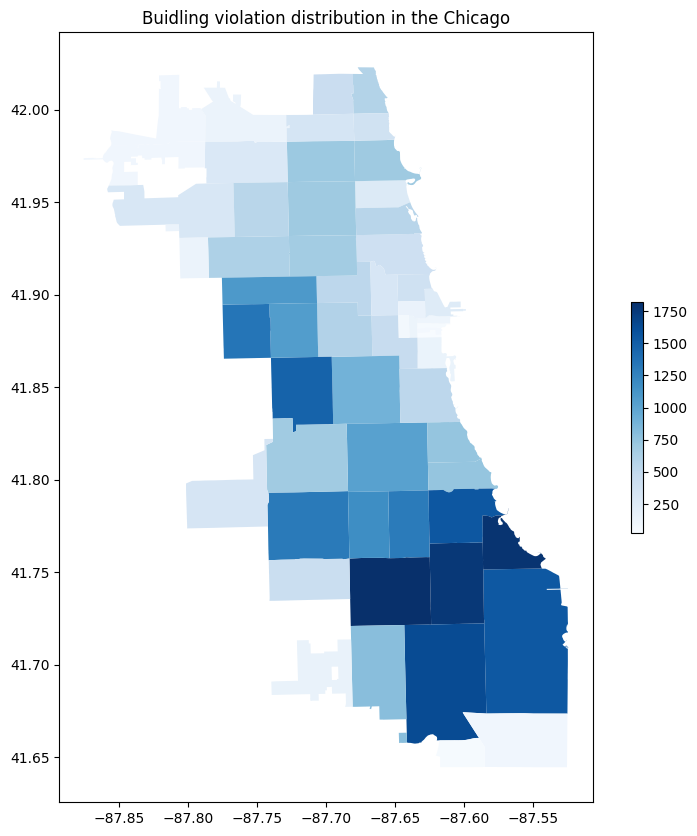

In [13]:
# Generated heatmap of building violation

# convert zipcode from string to integer
gdf['zip'] = gdf['zip'].astype(str).astype(int) 
df_agg_by_zip = gdf_joined
df_agg_by_zip = df_agg_by_zip.groupby(['zip']).size().reset_index(name="count")
df_agg_by_zip
gdf_violation = pd.merge(df_agg_by_zip, gdf, how='inner', on='zip')
gdf_violation = gpd.GeoDataFrame(gdf_violation, crs="EPSG:4326", geometry='geometry')

fig, ax = plt.subplots(nrows=1, figsize=(10,10))

ax.set_title('Buidling violation distribution in the Chicago', fontsize=12)
gdf_violation.plot(column = 'count', ax=ax, cmap='Blues', legend=True, legend_kwds={'shrink': 0.3})
plt.show()

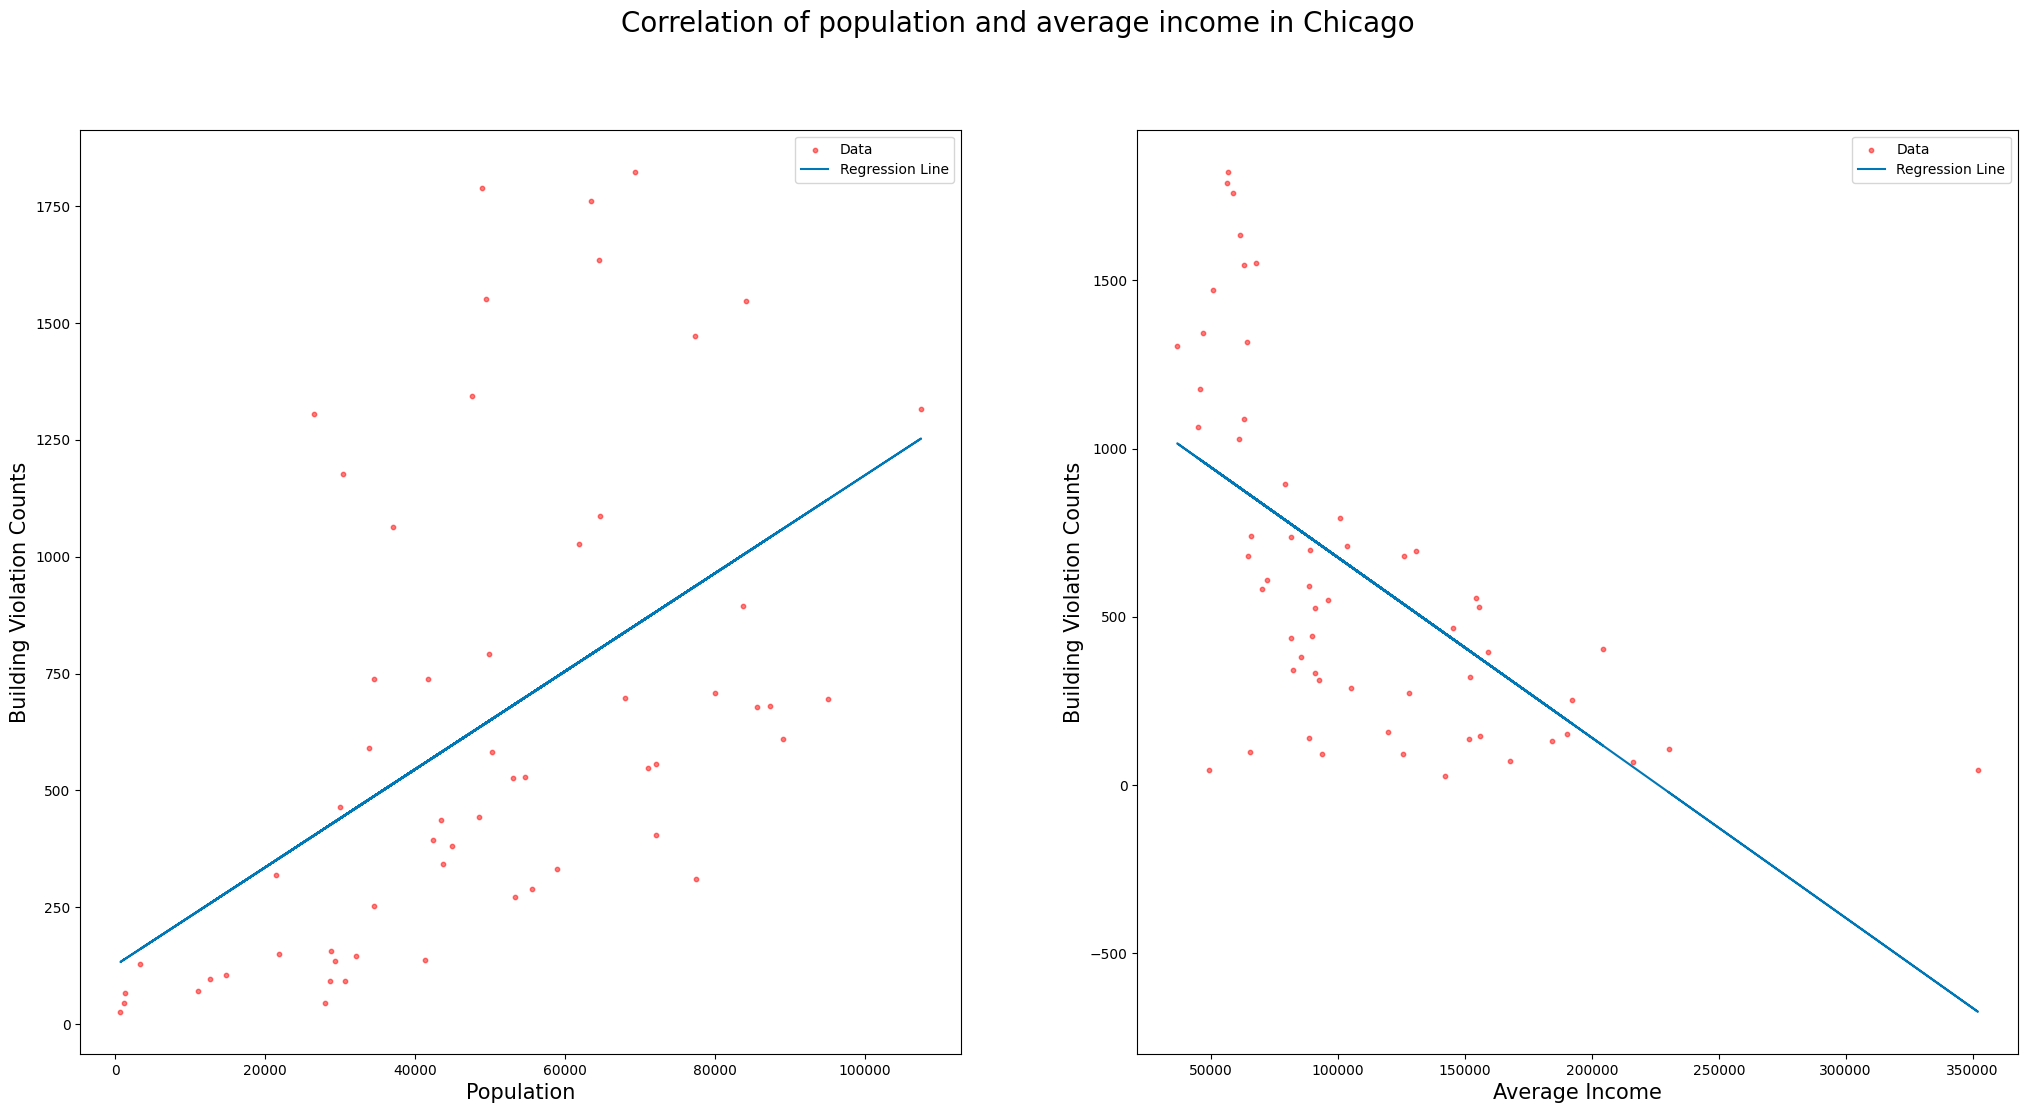

In [27]:
# check the relationship between building violation and population
df_population = gdf_joined.groupby(['zip']).size().reset_index(name="count")
df_agg_population = df_com[['Population', 'Average Income','ZipCode']]
# rename the column name to match the other dataframe
df_agg_population = df_agg_population.rename(columns={"ZipCode": "zip"}) 
df_population = pd.merge(df_agg_population, df_population, how='inner', on='zip')

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(25,12))
fig.suptitle('Correlation of population and average income in Chicago',fontsize=20)

X1 = df_population[['Population']]
y1 = df_population['count'] 

X2 = df_population[['Average Income']]
y2 = df_population['count'] 

# Create and train the model
model1 = LinearRegression()
model2 = LinearRegression()
model1.fit(X1, y1)
model2.fit(X2, y2)

# Make predictions
df_population['predicted_count_by_population'] = model1.predict(X1)
df_population['predicted_count_by_Income'] = model2.predict(X2)

# Plotting
ax1.scatter(df_population['Population'], df_population['count'], s=10, c='red', alpha=0.5, label="Data")
ax1.plot(df_population['Population'], df_population['predicted_count_by_population'], color='#0077b6', label="Regression Line")
ax1.set_xlabel('Population',fontsize=15)
ax1.set_ylabel('Building Violation Counts',fontsize=15)

ax2.scatter(df_population['Average Income'], df_population['count'], s=10, c='red', alpha=0.5, label="Data")
ax2.plot(df_population['Average Income'], df_population['predicted_count_by_Income'], color='#0077b6', label="Regression Line")
ax2.set_xlabel('Average Income',fontsize=15)
ax2.set_ylabel('Building Violation Counts',fontsize=15)
ax1.legend()
ax2.legend()

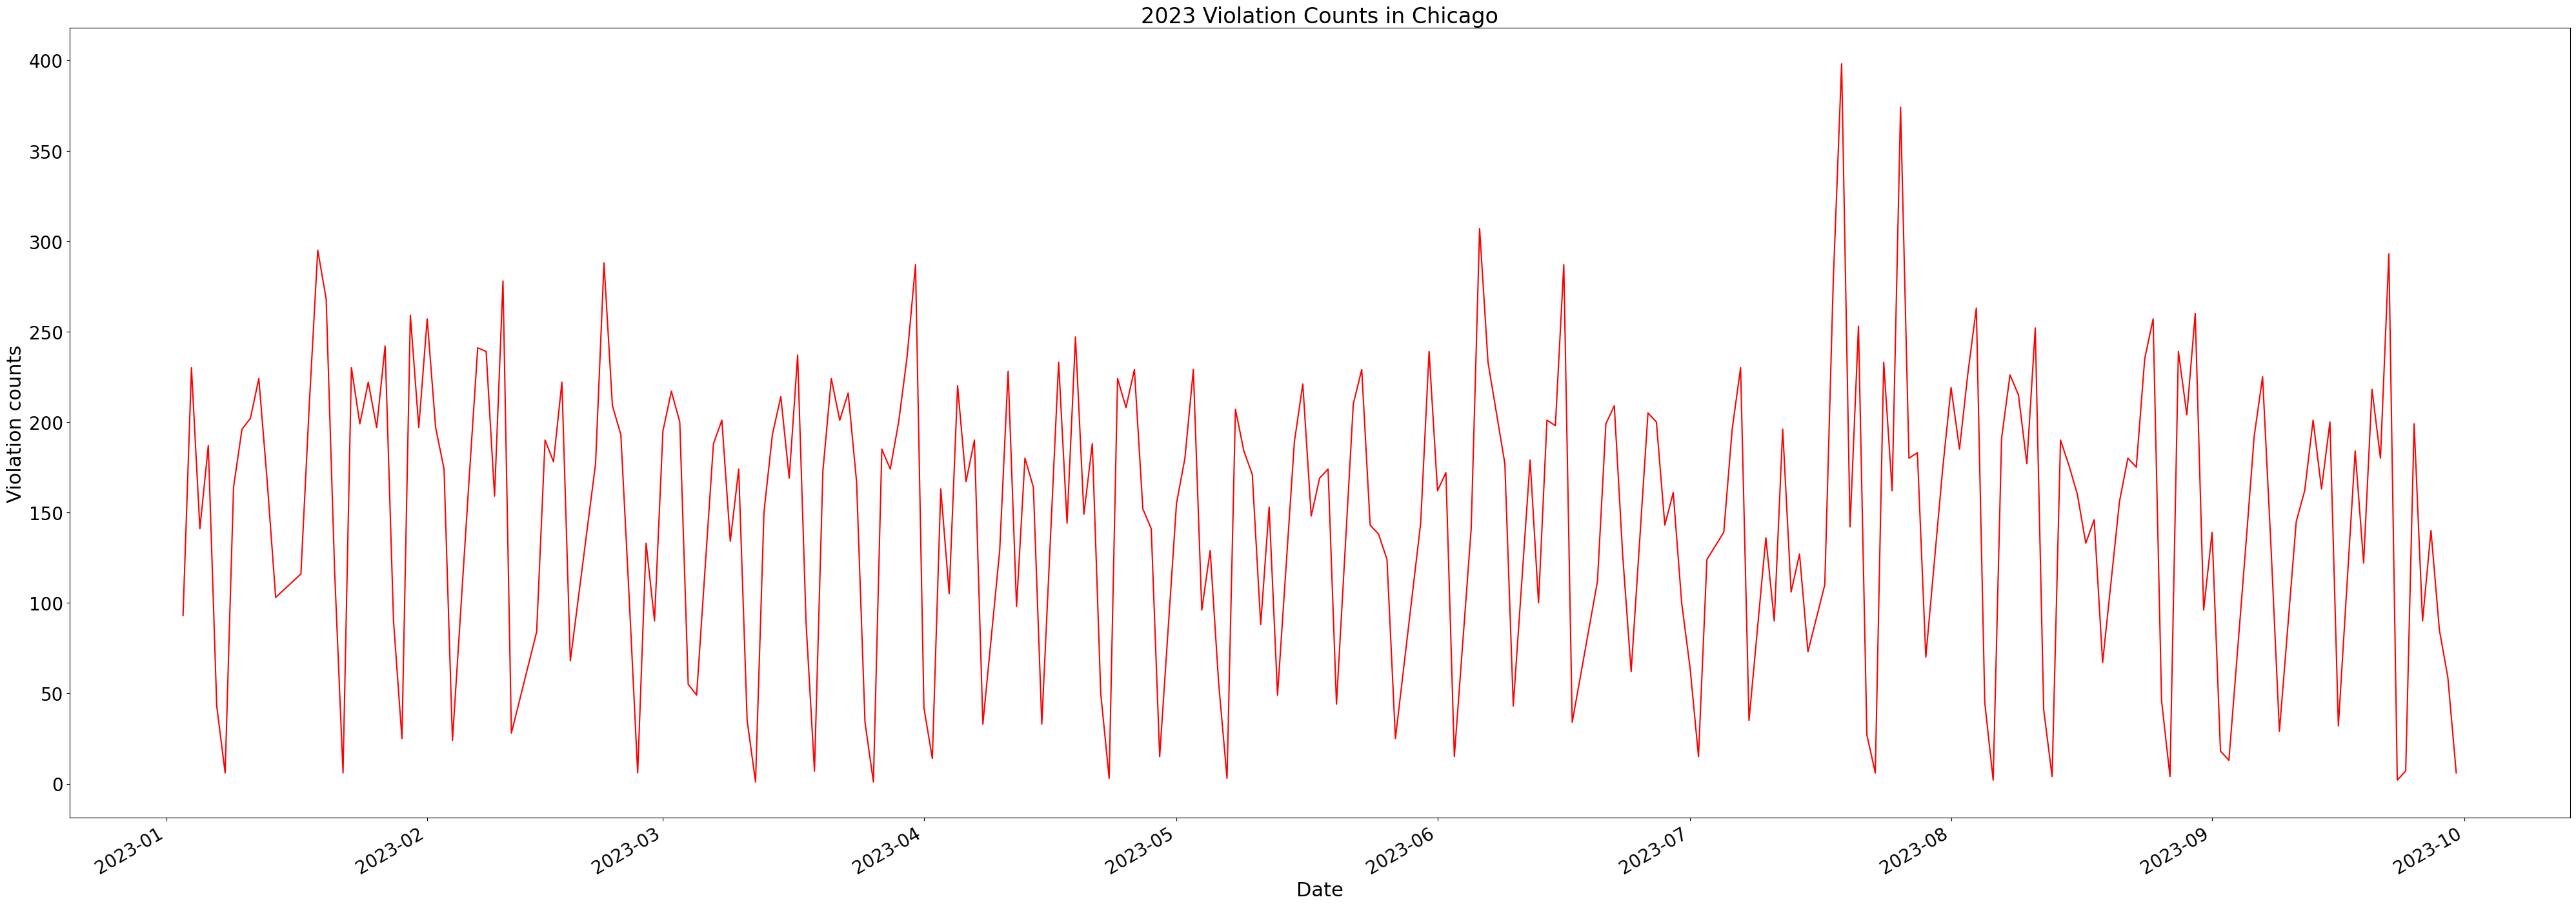

In [ ]:
# Number of building violation in 2023 cases over time in Chicago
df_violation_2023 = df_2023

# Group by 'VIOLATION DATE' and count rows
violation_counts = df_violation_2023.groupby('VIOLATION DATE').size()

fig, ax = plt.subplots(figsize=(50,18))

# Plot the violation counts
violation_counts.plot(ax=ax, color='Red')
# set figure properties:
ax.set_xlabel("Date")
ax.set_ylabel("Violation counts")
ax.set_title("2023 Violation Counts in Chicago")
ax.title.set_size(24)
ax.xaxis.label.set_size(22)
ax.yaxis.label.set_size(22)
ax.tick_params(axis='both', which='major', labelsize=20)

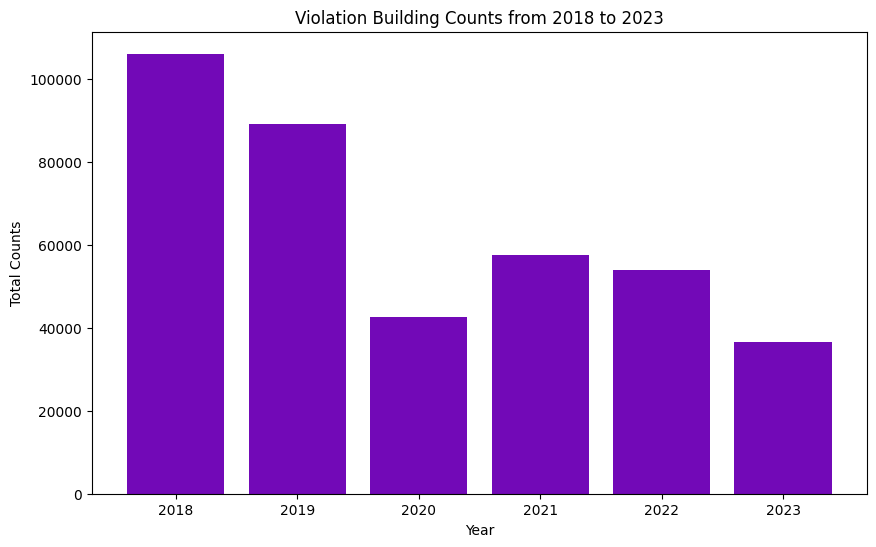

In [ ]:
# Generate building violation bar chart from 2018-2023
years = ['2018', '2019', '2020', '2021', '2022', '2023']
counts = [
    len(df_2018),
    len(df_2019),
    len(df_2020),
    len(df_2021),
    len(df_2022),
    len(df_2023)
]

plt.figure(figsize=(10, 6))
plt.bar(years, counts, color='#7209b7')
plt.xlabel('Year')
plt.ylabel('Total Counts')
plt.title('Violation Building Counts from 2018 to 2023')
plt.show()

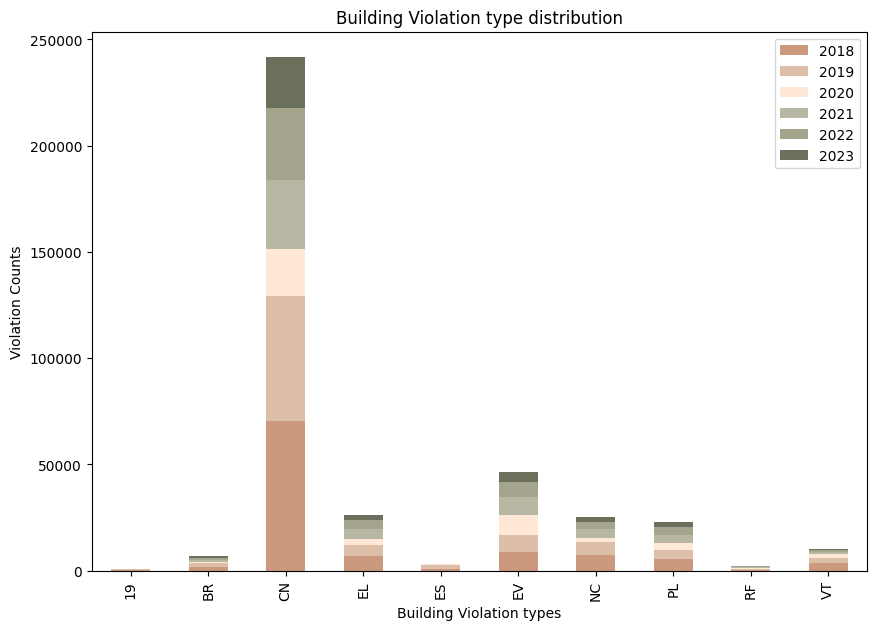

In [ ]:
# created a stacked bar chart to view the distribution of each building violation type
violation_counts_2018 = df_2018[['VIOLATION CODE']]
violation_counts_2019 = df_2019[['VIOLATION CODE']]
violation_counts_2020 = df_2020[['VIOLATION CODE']]
violation_counts_2021 = df_2021[['VIOLATION CODE']]
violation_counts_2022 = df_2022[['VIOLATION CODE']]
violation_counts_2023 = df_2023[['VIOLATION CODE']]

violation_counts_2018.loc[:, 'VIOLATION CODE'] = violation_counts_2018['VIOLATION CODE'].str.slice(0, 2)
violation_counts_2019.loc[:, 'VIOLATION CODE'] = violation_counts_2019['VIOLATION CODE'].str.slice(0, 2)
violation_counts_2020.loc[:, 'VIOLATION CODE'] = violation_counts_2020['VIOLATION CODE'].str.slice(0, 2)
violation_counts_2021.loc[:, 'VIOLATION CODE'] = violation_counts_2021['VIOLATION CODE'].str.slice(0, 2)
violation_counts_2022.loc[:, 'VIOLATION CODE'] = violation_counts_2022['VIOLATION CODE'].str.slice(0, 2)
violation_counts_2023.loc[:, 'VIOLATION CODE'] = violation_counts_2023['VIOLATION CODE'].str.slice(0, 2)

violation_counts_2018 = violation_counts_2018.groupby('VIOLATION CODE').size().reset_index(name='2018')
violation_counts_2019 = violation_counts_2019.groupby('VIOLATION CODE').size().reset_index(name='2019')
violation_counts_2020 = violation_counts_2020.groupby('VIOLATION CODE').size().reset_index(name='2020')
violation_counts_2021 = violation_counts_2021.groupby('VIOLATION CODE').size().reset_index(name='2021')
violation_counts_2022 = violation_counts_2022.groupby('VIOLATION CODE').size().reset_index(name='2022')
violation_counts_2023 = violation_counts_2023.groupby('VIOLATION CODE').size().reset_index(name='2023')

vioaltion_counts = violation_counts_2018

vioaltion_counts = violation_counts_2018.merge(violation_counts_2019,on='VIOLATION CODE').merge(violation_counts_2020,on='VIOLATION CODE').merge(violation_counts_2021,on='VIOLATION CODE').merge(violation_counts_2022,on='VIOLATION CODE').merge(violation_counts_2023,on='VIOLATION CODE')
ax = vioaltion_counts.plot(x='VIOLATION CODE', kind='bar', color=['#cb997e', '#ddbea9', '#ffe8d6', '#b7b7a4', '#a5a58d', '#6b705c'], stacked=True, figsize=(10,7))
plt.title('Building Violation type distribution')
plt.xlabel('Building Violation types')
plt.ylabel('Violation Counts')
plt.show()